# **EDA and Cleaning Train CSV**



### **Imports**
---

In [669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load the data**
-----

In [670]:
train = pd.read_csv('../data/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## **EDA**
-----

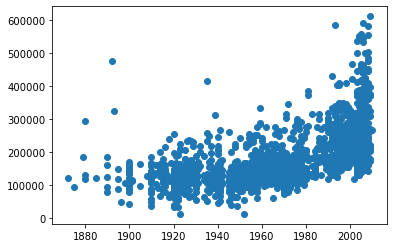

In [671]:
#plotting to check if linear relationship between discrete variable and target

# linear relationship - treat as integer, 
# non-linear - treat as str type (categorical)

plt.scatter(train['Year Built'], train['SalePrice']);

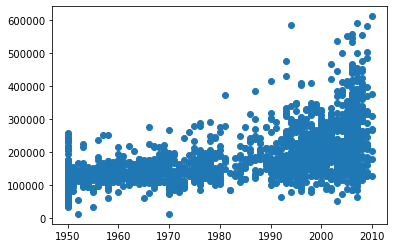

In [672]:
plt.scatter(train['Year Remod/Add'], train['SalePrice']);

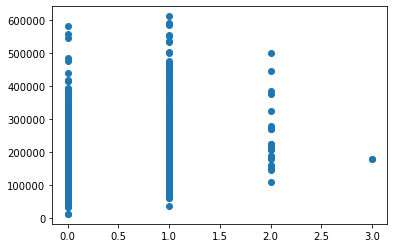

In [673]:
plt.scatter(train['Bsmt Full Bath'], train['SalePrice']);

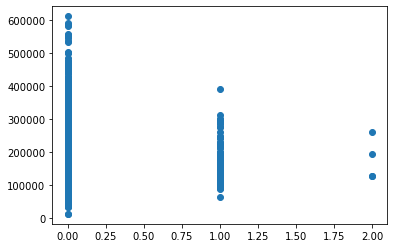

In [674]:
plt.scatter(train['Bsmt Half Bath'], train['SalePrice']);

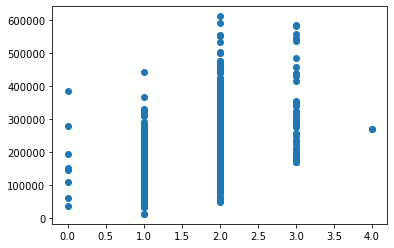

In [675]:
plt.scatter(train['Full Bath'], train['SalePrice']);

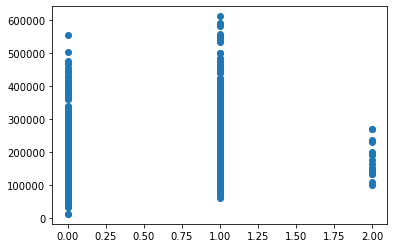

In [676]:
plt.scatter(train['Half Bath'], train['SalePrice']);

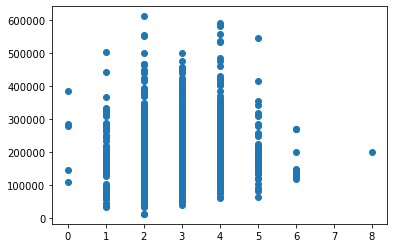

In [677]:
plt.scatter(train['Bedroom AbvGr'], train['SalePrice']);

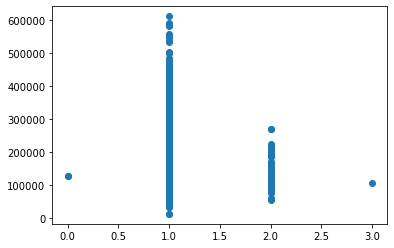

In [678]:
plt.scatter(train['Kitchen AbvGr'], train['SalePrice']);

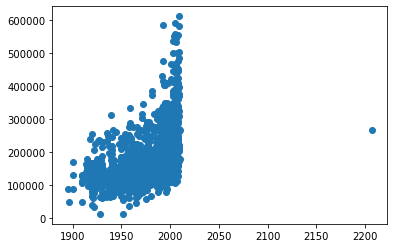

In [679]:
plt.scatter(train['Garage Yr Blt'], train['SalePrice']);

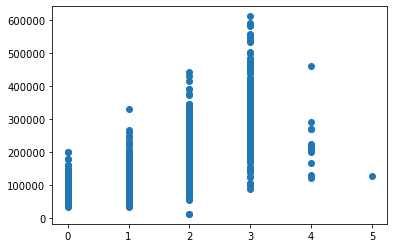

In [680]:
plt.scatter(train['Garage Cars'], train['SalePrice']);

In [681]:
#check nulls and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [682]:
train.shape

(2051, 81)

### **Data Cleaning**
-----

##### *Dealing with Null Values*

In [683]:
# save an original dataframe to go back to if necessary
train_original = train

In [684]:
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [685]:
train['Alley'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object

In [686]:
train['Alley'] = train['Alley'].map(lambda itm: 'None' if itm == 'NaN' else str(itm))

In [687]:
train['Alley'].value_counts()

nan     1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

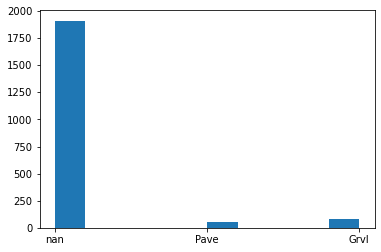

In [688]:
plt.hist(train['Alley']);

In [689]:
# applying same method to other categorical variables
# where NA is one of the categories and should not read as null
# applymap() used on data frame 

train[['Mas Vnr Type','Bsmt Qual','Bsmt Cond','BsmtFin Type 1', 'Bsmt Exposure',
       'BsmtFin Type 2', 'Pool QC','Garage Qual', 'Garage Cond', 'Fence', 'Misc Feature', 'Fireplace Qu', 'Garage Finish',
       'Garage Type'
      ]] = train[['Mas Vnr Type','Bsmt Qual','Bsmt Cond','BsmtFin Type 1', 'Bsmt Exposure',
       'BsmtFin Type 2', 'Pool QC','Garage Qual', 'Garage Cond', 'Fence', 'Misc Feature','Fireplace Qu', 'Garage Finish','Garage Type']].applymap(lambda itm: 'None' if itm == 'NaN' else str(itm))

In [690]:
train['Mas Vnr Type'].value_counts() # drop null values but not "None" values

None       1218
BrkFace     630
Stone       168
nan          22
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [691]:
train['Bsmt Qual'].value_counts() #NA means no basement

TA     887
Gd     864
Ex     184
Fa      60
nan     55
Po       1
Name: Bsmt Qual, dtype: int64

In [692]:
train['Bsmt Cond'].value_counts() #NA means no basement

TA     1834
Gd       89
Fa       65
nan      55
Po        5
Ex        3
Name: Bsmt Cond, dtype: int64

In [693]:
train['BsmtFin Type 1'].value_counts() #NA means no basement

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
nan     55
Name: BsmtFin Type 1, dtype: int64

In [694]:
train['Bsmt Exposure'].value_counts() #NA means no basement

No     1339
Av      288
Gd      203
Mn      163
nan      58
Name: Bsmt Exposure, dtype: int64

In [695]:
train['Bsmt Cond'].value_counts() #NA means no basement

TA     1834
Gd       89
Fa       65
nan      55
Po        5
Ex        3
Name: Bsmt Cond, dtype: int64

In [696]:
train['Pool QC'].value_counts() #NA means no pool

nan    2042
Gd        4
Fa        2
TA        2
Ex        1
Name: Pool QC, dtype: int64

In [697]:
train['Garage Qual'].value_counts() #NA means no garage

TA     1832
nan     114
Fa       82
Gd       18
Ex        3
Po        2
Name: Garage Qual, dtype: int64

In [698]:
train['Garage Cond'].value_counts() #NA means no garage

TA     1868
nan     114
Fa       47
Gd       12
Po        8
Ex        2
Name: Garage Cond, dtype: int64

In [699]:
train['Fence'].value_counts() #NA means no fence

nan      1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

In [700]:
train['Misc Feature'].value_counts() #NA means no misc. features

nan     1986
Shed      56
Gar2       4
Othr       3
TenC       1
Elev       1
Name: Misc Feature, dtype: int64

In [701]:
train['Fireplace Qu'].value_counts() #NA means no fireplace 

nan    1000
Gd      523
TA      407
Fa       59
Po       31
Ex       31
Name: Fireplace Qu, dtype: int64

In [702]:
train['Garage Finish'].value_counts() #NA means no garage

Unf    849
RFn    579
Fin    509
nan    114
Name: Garage Finish, dtype: int64

In [703]:
# to string
# non-linear relationship between 'Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr' and target
train[['Overall Qual','Overall Cond','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','Garage Cars']] = train[['Overall Qual','Overall Cond','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr', 'Garage Cars']].astype(str)

In [704]:
# update data types based on data dictionary
# to float
train[['Lot Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF',
       'Gr Liv Area','Wood Deck SF','Open Porch SF','Enclosed Porch',
      '3Ssn Porch', 'Screen Porch','Pool Area','Misc Val','SalePrice']] = train[['Lot Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF',
       'Gr Liv Area','Wood Deck SF','Open Porch SF','Enclosed Porch',
      '3Ssn Porch', 'Screen Porch','Pool Area','Misc Val','SalePrice']].astype(float)

In [705]:
# drop nulls from numerical columns identified in boxplots above
print(train.shape)
train.dropna(subset=['Mas Vnr Area','Lot Frontage','Lot Area','Garage Yr Blt','BsmtFin SF 1'], inplace=True)
print(train.info())

(2051, 81)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 1 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1597 non-null   int64  
 1   PID              1597 non-null   int64  
 2   MS SubClass      1597 non-null   int64  
 3   MS Zoning        1597 non-null   object 
 4   Lot Frontage     1597 non-null   float64
 5   Lot Area         1597 non-null   float64
 6   Street           1597 non-null   object 
 7   Alley            1597 non-null   object 
 8   Lot Shape        1597 non-null   object 
 9   Land Contour     1597 non-null   object 
 10  Utilities        1597 non-null   object 
 11  Lot Config       1597 non-null   object 
 12  Land Slope       1597 non-null   object 
 13  Neighborhood     1597 non-null   object 
 14  Condition 1      1597 non-null   object 
 15  Condition 2      1597 non-null   object 
 16  Bldg Type        1597 non-null   object 
 17  Hou

In [706]:
train.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

-----
##### *Dealing with outliers*

In [707]:
# identify outliers for continuous variables
# remove outliers based on boxplots above

In [709]:
# function calculates lower (25th % - 1.5(IQR)) and upper (75th % + 1.5(IQR)) bounds
# framework to remove outliers
def calc_bounds(column):
    IQR = (train[column].quantile(0.75) - train[column].quantile(0.25))
    lower_bound = train[column].quantile(0.25) - (1.5 * IQR)
    upper_bound = train[column].quantile(0.75) + (1.5 * IQR)
    if lower_bound > 0:
        return f"train = train[(train['{column}'] > {lower_bound}) & (train['{column}'] < {upper_bound})]"
    return f"train = train[(train['{column}'] > 0) & (train['{column}'] < {upper_bound})]"

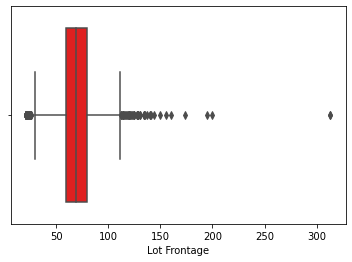

In [710]:
sns.boxplot(x = train['Lot Frontage'], color = 'r');

In [711]:
print(calc_bounds('Lot Frontage'))

train = train[(train['Lot Frontage'] > 27.5) & (train['Lot Frontage'] < 111.5)]


In [712]:
#sanity check
lower_bound = train['Lot Frontage'].quantile(0.25) - (1.5 * (train['Lot Frontage'].quantile(0.75) - train['Lot Frontage'].quantile(0.25)))
upper_bound = train['Lot Frontage'].quantile(0.75) + (1.5 * (train['Lot Frontage'].quantile(0.75) - train['Lot Frontage'].quantile(0.25)))
print(lower_bound, upper_bound)

27.5 111.5


In [713]:
train = train[(train['Lot Frontage'] > 27.5) & (train['Lot Frontage'] < 111.5)]

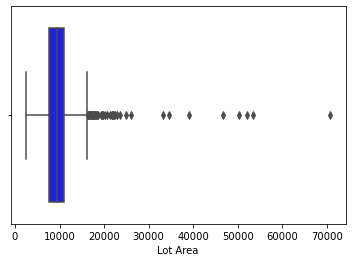

In [714]:
sns.boxplot(x = train['Lot Area'], color = 'b');

In [715]:
print(calc_bounds('Lot Area'))

train = train[(train['Lot Area'] > 2431.125) & (train['Lot Area'] < 16260.125)]


In [716]:
train = train[(train['Lot Area'] > 2431.125) & (train['Lot Area'] < 16260.125)]

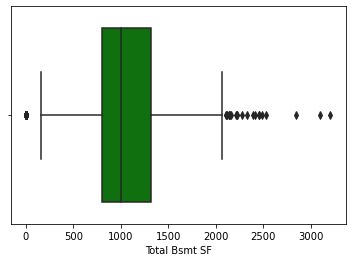

In [718]:
sns.boxplot(x = train['Total Bsmt SF'], color = 'g');

In [719]:
print(calc_bounds('Total Bsmt SF'))

train = train[(train['Total Bsmt SF'] > 30.5) & (train['Total Bsmt SF'] < 2082.5)]


In [720]:
train = train[(train['Total Bsmt SF'] > 30.5) & (train['Total Bsmt SF'] < 2082.5)]

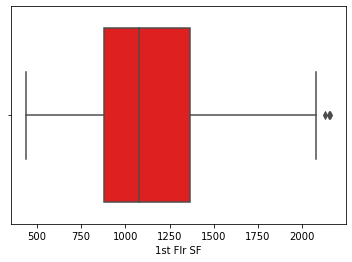

In [721]:
sns.boxplot(x = train['1st Flr SF'], color = 'r');

In [722]:
print(calc_bounds('1st Flr SF'))

train = train[(train['1st Flr SF'] > 154.75) & (train['1st Flr SF'] < 2088.75)]


In [723]:
train = train[(train['1st Flr SF'] > 154.75) & (train['1st Flr SF'] < 2088.75)]

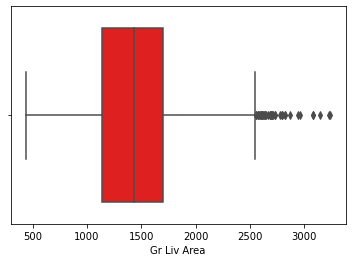

In [724]:
sns.boxplot(x = train['Gr Liv Area'], color = 'r');

In [725]:
print(calc_bounds('Gr Liv Area'))

train = train[(train['Gr Liv Area'] > 300.5) & (train['Gr Liv Area'] < 2544.5)]


In [726]:
train = train[(train['Gr Liv Area'] > 300.5) & (train['Gr Liv Area'] < 2544.5)]

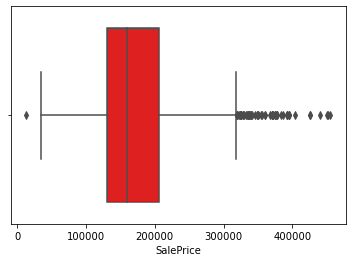

In [729]:
sns.boxplot(x = train['SalePrice'], color = 'r');

In [730]:
print(calc_bounds('SalePrice'))

train = train[(train['SalePrice'] > 16750.0) & (train['SalePrice'] < 318750.0)]


In [731]:
train = train[(train['SalePrice'] > 16750.0) & (train['SalePrice'] < 318750.0)]

In [732]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 1 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1272 non-null   int64  
 1   PID              1272 non-null   int64  
 2   MS SubClass      1272 non-null   int64  
 3   MS Zoning        1272 non-null   object 
 4   Lot Frontage     1272 non-null   float64
 5   Lot Area         1272 non-null   float64
 6   Street           1272 non-null   object 
 7   Alley            1272 non-null   object 
 8   Lot Shape        1272 non-null   object 
 9   Land Contour     1272 non-null   object 
 10  Utilities        1272 non-null   object 
 11  Lot Config       1272 non-null   object 
 12  Land Slope       1272 non-null   object 
 13  Neighborhood     1272 non-null   object 
 14  Condition 1      1272 non-null   object 
 15  Condition 2      1272 non-null   object 
 16  Bldg Type        1272 non-null   object 
 17  House Style   

-----
##### *Editing column names*

In [737]:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492.0,Pave,nan,IR1,Lvl,...,0.0,0.0,nan,nan,nan,0.0,4,2009,WD,220000.0
2,153,535304180,20,RL,68.0,7922.0,Pave,nan,Reg,Lvl,...,0.0,0.0,nan,nan,nan,0.0,1,2010,WD,109000.0


In [736]:
#check column names
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [739]:
train.rename(columns = {'Id':'sale_id', 'PID':'parcel_id', 'MS SubClass': 'dwelling_type', 
                        'MS Zoning':'zoning_type', 'Lot Frontage':'lot_frontage', 'Lot Area':'lot_area',
                        'Street':'street_surface', 'Alley':'alley_surface', 'Lot Shape':'property_shape',
                        'Land Contour':'property_flatness', 'Utilities':'util_avail','Lot Config': 'lot_position',
                        'Land Slope':'property_slope', 'Neighborhood':'ames_neighborhood', 'Condition 1':'prox_to_transport',
                        'Condition 2':'prox_to_transport_2', 'Bldg Type':'bldg_type', 'House Style':'floors', 'Overall Qual':'house_quality',
                        'Overall Cond':'house_condition', 'Year Built':'year_built', 'Year Remod/Add':'year_remodeled',
                        'Roof Style':'roof_style','Roof Matl':'roof_material', 'Exterior 1st':'ext_covering', 'Exterior 2nd':'ext_covering2',
                        'Mas Vnr Type':'masonry_veneer_type','Mas Vnr Area':'masonry_veneer_area',
                        'Exter Qual':'exterior_quality', 'Exter Cond':'exterior_condition',
                        'Foundation':'foundation_type', 'Bsmt Qual':'basement_height','Bsmt Cond':'basement_condition',
                        'Bsmt Exposure':'basement_walkouts', 'BsmtFin Type 1':'basement_finished_rating', 'BsmtFin SF 1':'finished_area',
                        'BsmtFin Type 2':'basement_finished_rating2', 'BsmtFin SF 2':'finished_area2',
                        'Bsmt Unf SF':'unfinished_area','Total Bsmt SF':'total_basement_area','Heating':'heating_type',
                        'Heating QC':'heating_quality', 'Central Air':'central_air', 'Electrical':'electrical_setup',
                        '1st Flr SF':'first_fl_area','2nd Flr SF':'second_fl_area','Low Qual Fin SF':'low_qual_finished_area',
                        'Gr Liv Area':'above_ground_living_area', 'Bsmt Full Bath': 'full_bathrooms_basement',
                        'Bsmt Half Bath':'half_bathrooms_basement', 'Full Bath':'full_bathrooms_above_ground',
                        'Half Bath':'half_bathrooms_above_ground', 'Bedroom AbvGr':'bedrooms_above_ground',
                        'Kitchen AbvGr':'kitchens_above_ground', 'Kitchen Qual':'kitchen_quality', 'TotRms AbvGrd':'total_rooms_above_ground',
                        'Functional':'home_functionality','Fireplaces':'number_fireplaces', 'Fireplace Qu':'fireplace_quality',
                        'Garage Type':'garage_location', 'Garage Yr Blt':'garage_yr_built','Garage Finish':'garage_finished',
                        'Garage Cars':'garage_car_capacity', 'Garage Area':'garage_size', 'Garage Qual':'garage_quality','Garage Cond':'garage_condition',
                        'Paved Drive':'driveway_surface', 'Wood Deck SF':'wood_deck_size', 'Open Porch SF':'open_porch_size',
                        'Enclosed Porch':'enclose_porch_size', '3Ssn Porch':'three_season_porch_size', 'Screen Porch':'screen_porch_size',
                        'Pool Area':'pool_size', 'Pool QC':'pool_quality','Fence':'fence_quality', 'Misc Feature':'misc_features',
                        'Misc Val':'misc_features_value', 'Mo Sold':'month_sold', 'Yr Sold':'year_sold', 'Sale Type':'sale_type',
                        'SalePrice':'sale_price'}, inplace=True)
train.columns

Index(['sale_id', 'parcel_id', 'dwelling_type', 'zoning_type', 'lot_frontage',
       'lot_area', 'street_surface', 'alley_surface', 'property_shape',
       'property_flatness', 'util_avail', 'lot_position', 'property_slope',
       'ames_neighborhood', 'prox_to_transport', 'prox_to_transport_2',
       'bldg_type', 'floors', 'house_quality', 'house_condition', 'year_built',
       'year_remodeled', 'roof_style', 'roof_material', 'ext_covering',
       'ext_covering2', 'masonry_veneer_type', 'masonry_veneer_area',
       'exterior_quality', 'exterior_condition', 'foundation_type',
       'basement_height', 'basement_condition', 'basement_walkouts',
       'basement_finished_rating', 'finished_area',
       'basement_finished_rating2', 'finished_area2', 'unfinished_area',
       'total_basement_area', 'heating_type', 'heating_quality', 'central_air',
       'electrical_setup', 'first_fl_area', 'second_fl_area',
       'low_qual_finished_area', 'above_ground_living_area',
       'full_b

##### *Handling Categorical Variables*

In [753]:
#check data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 1 to 2050
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sale_id                      1272 non-null   int64  
 1   parcel_id                    1272 non-null   int64  
 2   dwelling_type                1272 non-null   int64  
 3   zoning_type                  1272 non-null   object 
 4   lot_frontage                 1272 non-null   float64
 5   lot_area                     1272 non-null   float64
 6   street_surface               1272 non-null   object 
 7   alley_surface                1272 non-null   object 
 8   property_shape               1272 non-null   object 
 9   property_flatness            1272 non-null   object 
 10  util_avail                   1272 non-null   object 
 11  lot_position                 1272 non-null   object 
 12  property_slope               1272 non-null   object 
 13  ames_neighborhood 

In [ ]:
 #need to pass these all as dummy features (cetegorical)

 6   street_surface               1272 non-null   object 
 7   alley_surface                1272 non-null   object 
 8   property_shape               1272 non-null   object 
 9   property_flatness            1272 non-null   object 
 10  util_avail                   1272 non-null   object 
 11  lot_position                 1272 non-null   object 
 12  property_slope               1272 non-null   object 
 13  ames_neighborhood            1272 non-null   object 
 14  prox_to_transport            1272 non-null   object 
 15  prox_to_transport_2          1272 non-null   object 
 16  bldg_type                    1272 non-null   object 
 17  floors                       1272 non-null   object 
 18  house_quality                1272 non-null   object 
 19  house_condition              1272 non-null   object 
 22  roof_style                   1272 non-null   object 
 23  roof_material                1272 non-null   object 
 24  ext_covering                 1272 non-null   object 
 25  ext_covering2                1272 non-null   object 
 26  masonry_veneer_type          1272 non-null   object 
 28  exterior_quality             1272 non-null   object 
 29  exterior_condition           1272 non-null   object 
 30  foundation_type              1272 non-null   object 
 31  basement_height              1272 non-null   object 
 32  basement_condition           1272 non-null   object 
 33  basement_walkouts            1272 non-null   object 
 34  basement_finished_rating     1272 non-null   object 
 36  basement_finished_rating2    1272 non-null   object 
 40  heating_type                 1272 non-null   object 
 41  heating_quality              1272 non-null   object 
 42  central_air                  1272 non-null   object 
 43  electrical_setup             1272 non-null   object 
 48  full_bathrooms_basement      1272 non-null   object 
 49  half_bathrooms_basement      1272 non-null   object 
 50  full_bathrooms_above_ground  1272 non-null   object 
 51  half_bathrooms_above_ground  1272 non-null   object 
 52  bedrooms_above_ground        1272 non-null   object 
 53  kitchens_above_ground        1272 non-null   object 
 54  kitchen_quality              1272 non-null   object 
 56  home_functionality           1272 non-null   object 
 58  fireplace_quality            1272 non-null   object 
 59  garage_location              1272 non-null   object 
 61  garage_finished              1272 non-null   object 
 62  garage_car_capacity          1272 non-null   object 
 64  garage_quality               1272 non-null   object 
 65  garage_condition             1272 non-null   object 
 66  driveway_surface             1272 non-null   object 
 73  pool_quality                 1272 non-null   object 
 74  fence_quality                1272 non-null   object 
 75  misc_features                1272 non-null   object 
 79  sale_type                    1272 non-null   object 

In [755]:
train['dwelling_type'] = train['dwelling_type'].astype(str)

In [772]:
dummy_df = pd.get_dummies(train[['dwelling_type','zoning_type','street_surface','alley_surface','property_shape','property_flatness',
                     'util_avail','lot_position','property_slope','ames_neighborhood','prox_to_transport','prox_to_transport_2',
                     'bldg_type', 'floors','house_quality','house_condition','roof_style', 'roof_material','ext_covering','ext_covering2',
                     'masonry_veneer_type','exterior_quality','exterior_condition','foundation_type','basement_height', 'basement_condition',
                     'basement_walkouts','basement_finished_rating','basement_finished_rating2','heating_type','heating_quality','central_air',
                     'electrical_setup', 'full_bathrooms_basement', 'half_bathrooms_basement', 'full_bathrooms_above_ground',
                     'half_bathrooms_above_ground','bedrooms_above_ground', 'kitchens_above_ground', 'kitchen_quality', 'home_functionality',
                     'fireplace_quality', 'garage_location', 'garage_finished', 'garage_car_capacity', 'garage_quality',
                     'garage_condition', 'driveway_surface','pool_quality','fence_quality', 'misc_features', 'sale_type']])              

In [774]:
print(dummy_df.shape)
dummy_df.head(20)

(1272, 297)


,dwelling_type_120,dwelling_type_160,dwelling_type_180,dwelling_type_190,dwelling_type_20,dwelling_type_30,dwelling_type_40,dwelling_type_45,dwelling_type_50,dwelling_type_60,...,misc_features_nan,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
11,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
14,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
15,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
16,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [775]:
dummy_df['sale_price'] = train['sale_price']

In [782]:
# comparing correlations of all categorical features to target 
dummy_df.corr()[['sale_price']].sort_values(by = 'sale_price', ascending=False)

,sale_price
sale_price,1.000000
exterior_quality_Gd,0.622846
foundation_type_PConc,0.598865
full_bathrooms_above_ground_2,0.587672
house_quality_8,0.551639
...,...
kitchen_quality_TA,-0.562917
garage_finished_Unf,-0.567855
full_bathrooms_above_ground_1,-0.600389
exterior_quality_TA,-0.642072


In [ ]:
#(add dummy columns to original df)

-------
##### *Exploratory Visualizations*

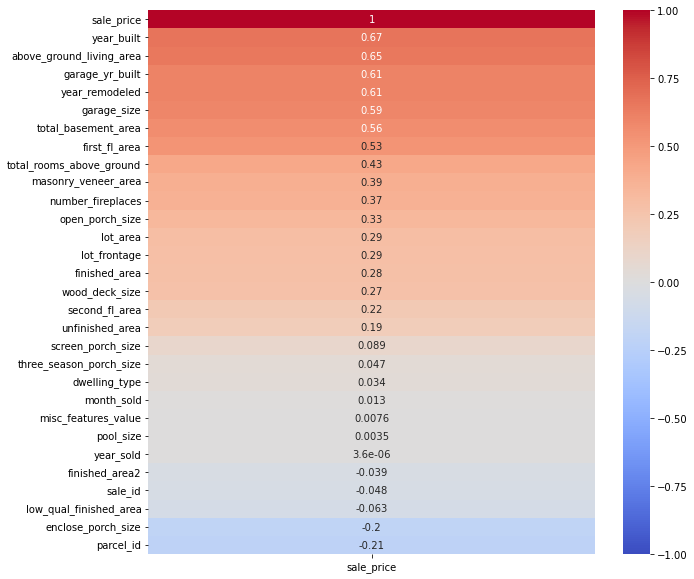

In [751]:
# comparing correlations of all numerical features to target (before creating dummy columns for categorical features)
plt.figure(figsize=(10,10))
sns.heatmap(train.corr()[['sale_price']].sort_values(by = 'sale_price', ascending=False), 
            annot=True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');          

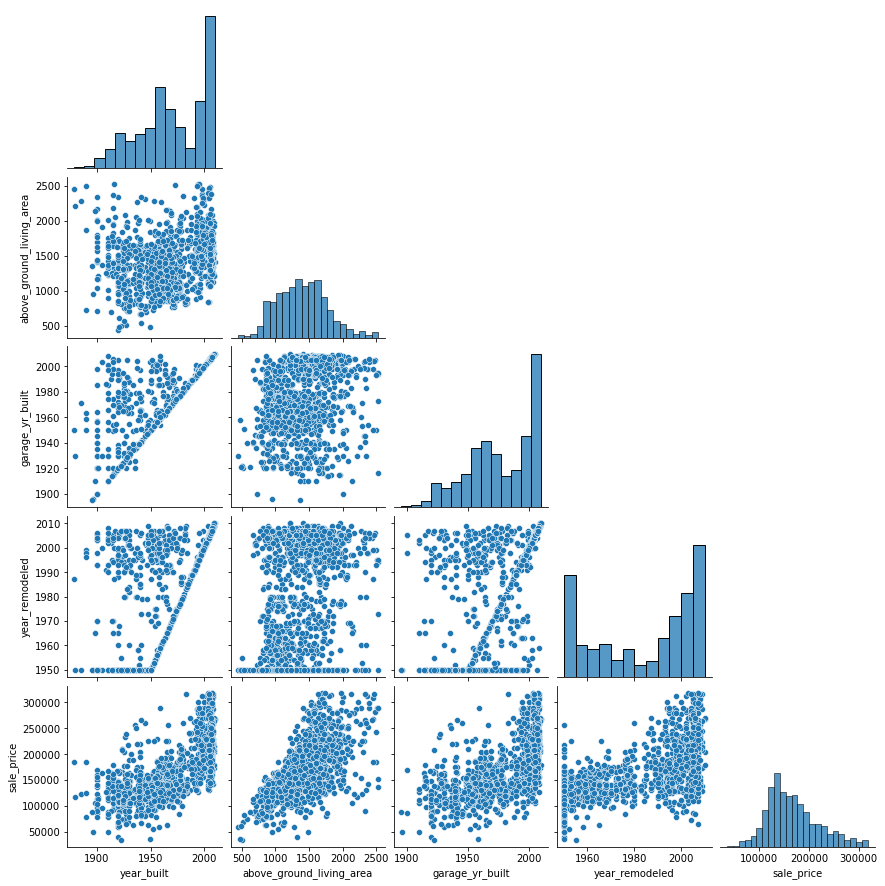

In [750]:
mask = np.zeros_like(train.corr()[['year_built','above_ground_living_area','garage_yr_built', 'year_remodeled','sale_price']])
mask[np.triu_indices_from(mask)] = True

sns.pairplot(train[['year_built','above_ground_living_area','garage_yr_built', 'year_remodeled','sale_price']],
            corner = True);

In [ ]:
# for exploration and modelling
#explore: sns.heatmap(df.corr()[['SalesPrice']], annot=True, ...)
#1) run model where all features includes - X = df.drop(columns = 'SalesPrice')

In [ ]:
# Three different way to create X:
#X = ads[['TV', 'radio', 'newspaper']]

#X = ads.drop(columns = ['sales']) # recommended with high dimensional datasets


In [ ]:
model without feature engineering, interaction terms, dropping collinear features manually